In [83]:
import numpy as np
import seaborn as sns
from sklearn.mixture import GaussianMixture
from numpy import random 
from sklearn import metrics
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame 

In [84]:
n_samples = 13000
n_samples_comp1 = 8000
n_samples_comp2 = n_samples - n_samples_comp1
mean_comp1 = np.array([13])
cov_comp1 = np.array([0.5])
mean_comp2 = np.array([12])
cov_comp2 = np.array([0.7])
samples_comp1 = np.random.normal(loc=mean_comp1, scale=cov_comp1, size=n_samples_comp1)
samples_comp2 = np.random.normal(loc=mean_comp2, scale=cov_comp2, size=n_samples_comp2)

In [85]:
zero_col = np.zeros((samples_comp1.shape[0], 1))
arr1 = np.column_stack((samples_comp1, zero_col))
ones_col = np.ones((samples_comp2.shape[0], 1))
arr2 = np.column_stack((samples_comp2, ones_col))
arr = np.concatenate((arr1, arr2), axis = 0)
arr

array([[13.44779983,  0.        ],
       [12.69679787,  0.        ],
       [12.82864247,  0.        ],
       ...,
       [11.66552578,  1.        ],
       [13.01249479,  1.        ],
       [13.16284587,  1.        ]])

In [86]:
gm = GaussianMixture(n_components=2)

In [87]:
gm.fit(arr[: , 0:1])
pred = gm.predict(arr[: , 0:1])
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [88]:
new_arr = np.concatenate((arr, np.array([pred]).T), axis=1)
new_arr[:,2:3]

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [89]:
metrics.accuracy_score(new_arr[:,1:2],new_arr[:,2:3])

0.8225384615384616

In [90]:
cnf_matrix = metrics.confusion_matrix(new_arr[:,1:2], new_arr[:,2:3])
cnf_matrix

array([[7362,  638],
       [1669, 3331]], dtype=int64)

<AxesSubplot: >

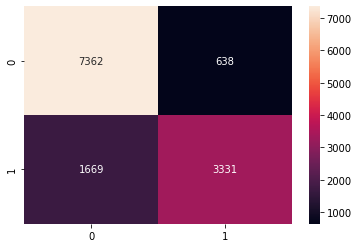

In [91]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

In [92]:
test, _ = make_blobs(n_samples=(8000, 5000), cluster_std=(0.5, 0.7))

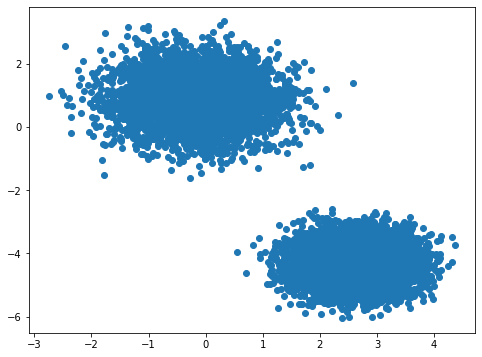

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(test[:,0], test[:,1])
plt.show()

In [106]:
gm = GaussianMixture(n_components=2)
gm.fit(test)

GaussianMixture(n_components=2)

In [107]:
centers = gm.means_
print(centers)

[[-0.16312609  0.88348194]
 [ 2.60182592 -4.28678284]]


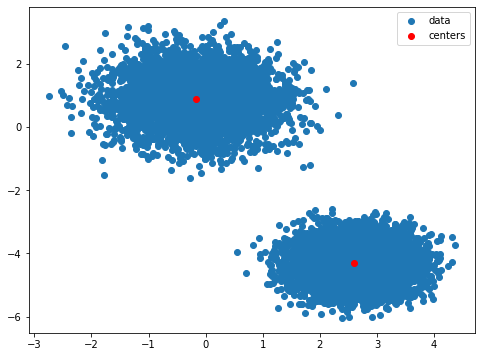

In [108]:
plt.figure(figsize=(8, 6))
plt.scatter(test[:,0], test[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
plt.legend()
plt.show() 

In [109]:
pred = gm.predict(test)

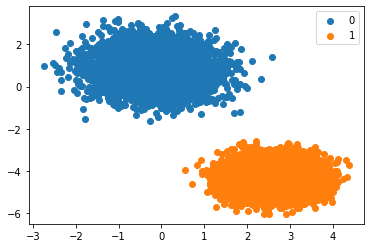

In [110]:
df = DataFrame({'x':test[:,0], 'y':test[:,1], 'label':pred})
groups = df.groupby('label')

ig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)

ax.legend()
plt.show()